# Introduction
Machine learning is about extracting knowledge from data. It is a research field at the
intersection of statistics, artificial intelligence, and computer science and is also
known as predictive analytics or statistical learning.

## Why Machine Learning ? 

Using handcoded rules to make decisions has two major disadvantages:
* The logic required to make a decision is specific to a single domain and task. Changing the task even slightly might require a rewrite of the whole system.
* Designing rules requires a deep understanding of how a decision should be made by a human expert.

### Problems Machine Learning Can Solve.

The most successful kinds of machine learning algorithms are those that automate decision-making processes by generalizing from known examples.

In supervised learning, the user provides the algorithm with pairs of inputs and desired outputs, and the algorithm finds a way to produce the desired output given an input. In particular, the algorithm is able to create an output for an input it has never seen before without any help from a human

Machine learning algorithms that learn from input/output pairs are called supervised learning algorithms.

Examples of supervised machine learning tasks include:
* Identifying the zip code from handwritten digits on an envelope
* Determining whether a tumor is benign based on a medical image
* Detecting fraudulent activity in credit card transactions

In unsupervised learning, only the input data is known, and no known output data is given to the algorithm.

Examples of unsupervised learning include:
* Identifying topics in a set of blog posts
* Segmenting customers into groups with similar preferences
* Detecting abnormal access patterns to a website

### Knowing Your Task and Knowing Your Data

the most important part in the machine learning process is understanding the data you are working with and how it relates to the task you want to solve.
While you are building a machine learning solution,you should answer, or at least keep in mind, the following questions:
* What question(s) am I trying to answer? Do I think the data collected can answer that question?
* What is the best way to phrase my question(s) as a machine learning problem?
* Have I collected enough data to represent the problem I want to solve?
* What features of the data did I extract, and will these enable the right predictions?
* How will I measure success in my application?
* How will the machine learning solution interact with other parts of my research or business product?

## Why Python ?

It combines the power of general-purpose programming languages with the ease of use of domain-specific scripting languages like MATLAB or R.
Python has libraries for data loading, visualization, statistics, natural language processing, image processing, and more. This vast toolbox provides data scientists with a large array of general- and special-purpose functionality. One of the main advantages of using Python is the abil‐ ity to interact directly with the code, using a terminal or other tools like the Jupyter Notebook.



## scikit-learn

scikit-learn is an open source project that contains a number of state-of-the-art machine learning algorithms, as well as comprehensive documentation about each algorithm. scikit-learn is a very popular tool, and the most prominent Python library for machine learning. It is widely used in industry and academia.

### Installing scikit-learn
$ pip install numpy scipy matplotlib ipython scikit-learn pandas



## Essential Libraries and Tools

### Jupyter Notebook
### Numpy

contains functionality for multidimensional arrays, highlevel mathematical functions such as linear algebra operations and the Fourier transform, and pseudorandom number generators. Any data you’re using will have to be converted to a NumPy array

In [1]:
import numpy as np 

In [2]:
x = np.array([[1, 2, 3], [4, 5, 6]])

In [3]:
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


### SciPy
This is a collection of functions for scientific computing in Python. In out case the most important part is `scipy.sparse` this provides _sparse matrices_. The are used when we want to store 2D arrays that contain mostly zeros.

In [4]:
from scipy import sparse

In [5]:
# create a 2d Numpy array with a duagonal of ones and seros everywhere else
eye = np.eye(4)
print("Numpy array:\n", eye)

Numpy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# COnvert the NUmpy array to a Scipy Sparse matrix in csr format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


It is not possible to create dense representations of sparse data as they would not fir into memory so we need to create  sparse representations directly. We can use COO format:


In [7]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix(data,(row_indices, col_indices))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0


### Matplotlib
This is used in visualizations.
when working in jupyter notebook use `%matplotlib inline` 
it is recommendend using `%matplotlib notebook` which provides an interactive environment.

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


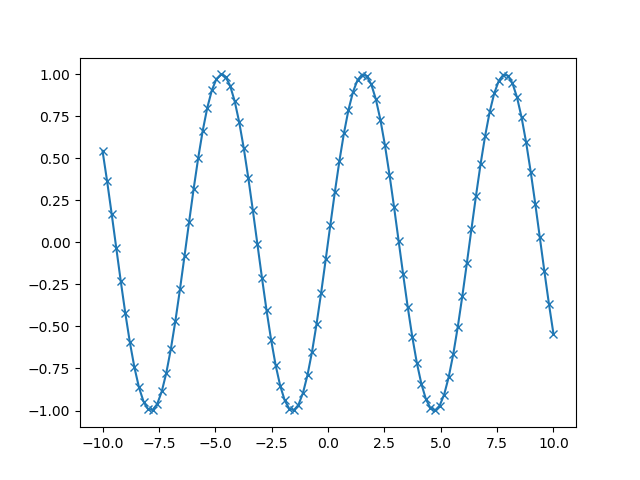

In [9]:
# GEnerate a sequence of numbers from  -10 to 0 with 100 steps in between
x = np.linspace(-10, 10, 100)

# create a second array using sine
y = np.sin(x)

# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

### Pandas
A library used for data wrangling and analysis. It's built around the dataframe structure, has sql like capabilities. 

In [10]:
import pandas as pd

In [11]:
# creating a dataset
data  = { 'Name' :["John","Anna", "Peter", "Linda"],
          'Location' : ["New York", "Paris", "Berlin", "London"],
         'Age' : [24, 13, 53, 33]
    
}

In [12]:
data_pandas = pd.DataFrame(data)

In [13]:
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [14]:
# select all rows tha have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## A First Application: Classify Iris Species
Our goal is to build a machine learning model that can learn from the measurements of these Irises whose soecies is known so that we can predict the species fir a new iris.
We know the input and the output thus this is a supervised learning problem. We wnat to predict  one pf several options this is also a classification problem.

### Meet the Data
Data is included in the scikit-learn dataset module

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris_dataset = load_iris()

In [17]:
type(iris_dataset)

sklearn.utils.Bunch

Data returned is of type Bunch which contains keys and values.


In [18]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [19]:
print(iris_dataset['DESCR'][:200] +"\n ...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
 ...


In [20]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [21]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
print("Type of data: ", type(iris_dataset['data']))

Type of data:  <class 'numpy.ndarray'>


In [23]:
print("shape of data:", iris_dataset['data'].shape)

shape of data: (150, 4)


150 samples time four features each. 

In [24]:
print("First five rows of data: \n", iris_dataset['data'][:5])

First five rows of data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [25]:
print("Type of target: ", type(iris_dataset['target']))

Type of target:  <class 'numpy.ndarray'>


In [26]:
print("shape of target:", iris_dataset['target'].shape)

shape of target: (150,)


In [27]:
print("Target:", iris_dataset['target'])

Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


### Measuring Success : Training and Testing Data
To asses model performance we show it data it has not seen before for which it has labels . This is done by splitting the data into _train_ and _test_. _Train set_ is used to build the model while _test set / holdout set_ is used to asses how well the model works.
To randomize samples and split them we'll use `train_test_split()` which splits the data into 75% train and 25% test.
Upper case X is used to denote data and lower case y to denote labels (X is a matrix and y is vector)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test , y_train, y_test = train_test_split(iris_dataset['data'], 
                                                     iris_dataset['target'], random_state=0)

In [31]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [32]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Looking at the data


<IPython.core.display.Javascript object>


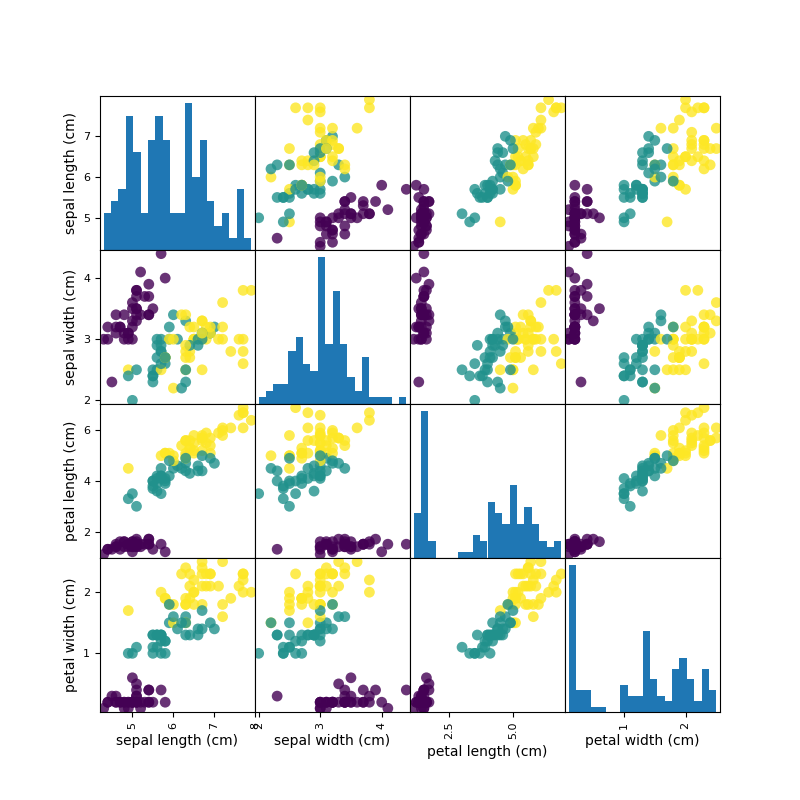

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64110a8f60>,
      dtype=object)

In [33]:
# Create a dataframe from data in _train
# label the column names with using the strings in iris_dataset.feature_name
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe color by y_train

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(8,8),
                          marker='o', hist_kwds={'bins':20}, s=60,
                          alpha=.8)

The plots are well separated.

### Building Your first Model : k-nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Making Predictions


In [36]:
X_new = np.array([[5,2.9,1,0.2]])

In [37]:
X_new.shape

(1, 4)

In [38]:
prediction = knn.predict(X_new)

In [39]:
print("Prediction:", prediction)
print("predicted target name: ",
     iris_dataset['target_names'][prediction])

Prediction: [0]
predicted target name:  ['setosa']


### Evaluating the model

In [40]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [41]:
print("Test set score: {:.2f} ".format(np.mean(y_pred == y_test)))

Test set score: 0.97 


In [42]:
# A better way to do it
print("Test set score: {:.2f} ".format(knn.score(X_test, y_test)))

Test set score: 0.97 
